In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [60]:
x = np.array([15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11]).reshape(-1, 1)
y = np.array([14.88, 11.57, 15.97, 14.21, 15.22, 11.78, 12.31, 17.78, 16.26, 15.56])

In [61]:
data = {
    'Propellant age x'   : [15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11],
    'Shear strength y '  : [14.88, 11.57, 15.97, 14.21, 15.22, 11.78, 12.31, 17.78, 16.26, 15.56]
}

In [62]:
df = pd.DataFrame(data)

In [63]:
df

Propellant age x  Shear strength y 
0             15.50              14.88
1             23.75              11.57
2              8.00              15.97
3             17.00              14.21
4              5.50              15.22
5             19.00              11.78
6             24.00              12.31
7              2.50              17.78
8              7.50              16.26
9             11.00              15.56

In [64]:
X = df.iloc[: , :1]

In [65]:
y = df.iloc[:,1:]

In [66]:
lambdas = [0 , 1e-4 ,1e-2]

In [67]:
x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
plt.figure(figsize = (10,6))
colors = ['red' , 'green' , 'blue']

<Figure size 1000x600 with 0 Axes>

In [68]:
from sklearn.linear_model import Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

**# ------- Ridge Regression (L2 Regularization) ------- #**

In [69]:
'''
Characteristics (L2):

- Shrinks coefficients toward zero (but never exactly zero).

- Good when all features are somewhat relevant.

- Helps handle multicollinearity (correlated features).

'''

'\nCharacteristics (L2):\n\n- Shrinks coefficients toward zero (but never exactly zero).\n\n- Good when all features are somewhat relevant.\n\n- Helps handle multicollinearity (correlated features).\n\n'

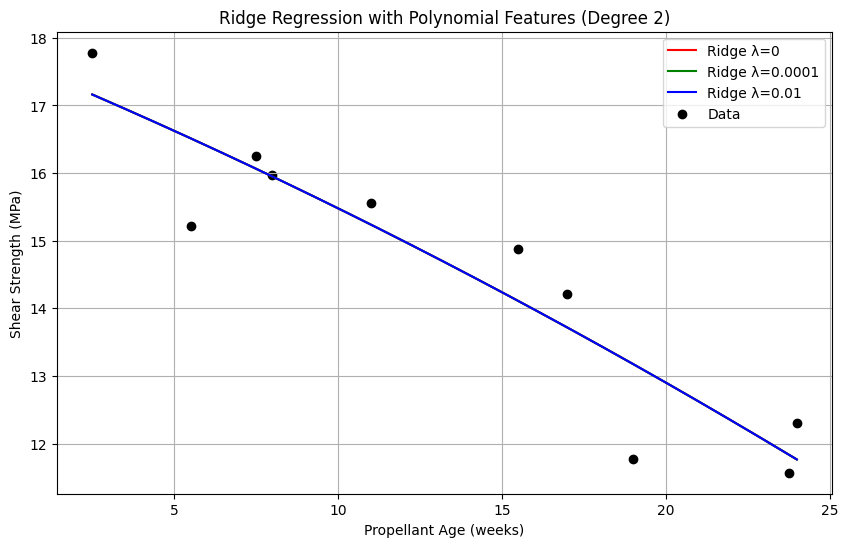

In [76]:
lambdas = [0, 0.0001, 0.01]
x_plot = np.linspace(min(x), max(x), 200).reshape(-1, 1)

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i, l in enumerate(lambdas):
    model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=l))
    model.fit(x, y)
    y_pred = model.predict(x_plot)
    plt.plot(x_plot, y_pred, label=f'Ridge λ={l}', color=colors[i])

plt.scatter(x, y, color='black', label='Data')
plt.title('Ridge Regression with Polynomial Features (Degree 2)')
plt.xlabel('Propellant Age (weeks)')
plt.ylabel('Shear Strength (MPa)')
plt.legend()
plt.grid(True)

plt.savefig("Ridge Regression (L2 Regularization)")
plt.show()


**# ------- Lasso Regression (L1 Regularization) ------- #**

In [77]:
'''

Characteristics (L1):

Can shrink some coefficients exactly to zero → automatic feature selection.

Works well when only a few features are important.


'''

'\n\nCharacteristics (L1):\n\nCan shrink some coefficients exactly to zero → automatic feature selection.\n\nWorks well when only a few features are important.\n\n\n'

In [78]:
x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
plt.figure(figsize = (10,6))
colors = ['red' , 'green' , 'blue']

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+00, tolerance: 3.864e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

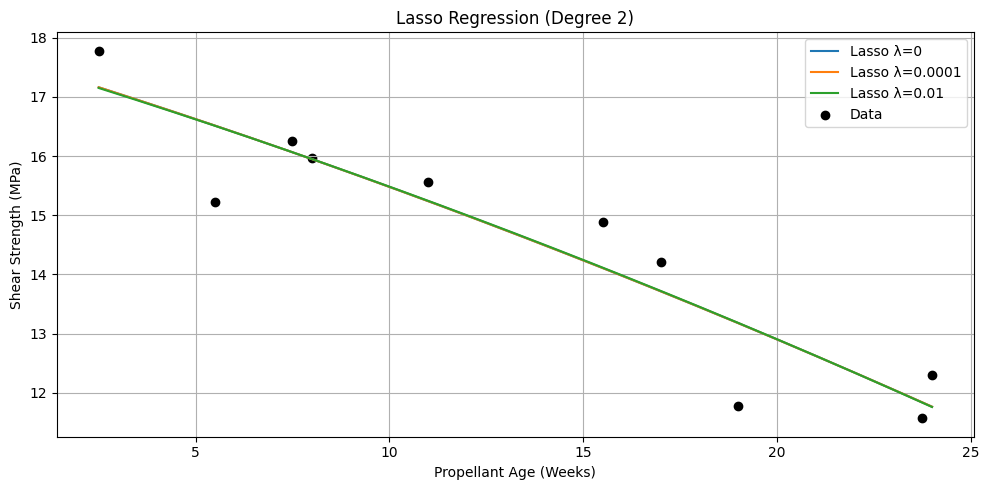

In [79]:
plt.figure(figsize=(10, 5))
for l in lambdas:
    model = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=l, max_iter=10000))
    model.fit(X, y)
    y_pred = model.predict(x_plot)
    plt.plot(x_plot, y_pred, label=f'Lasso λ={l}')
plt.scatter(X, y, color='black', label='Data')
plt.title('Lasso Regression (Degree 2)')
plt.xlabel('Propellant Age (Weeks)')
plt.ylabel('Shear Strength (MPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Lasso Regression (L1 Regularization)")
plt.show()

**coincidently , Here the Regression curve is coming out to be same for all three lambdas (given) but once we change the lambdas little bit the curves will be seperately visible **

In [80]:
''' lets redefine lambdas list '''
lambdaa = [ 10  ,0.2 , 0.0002]



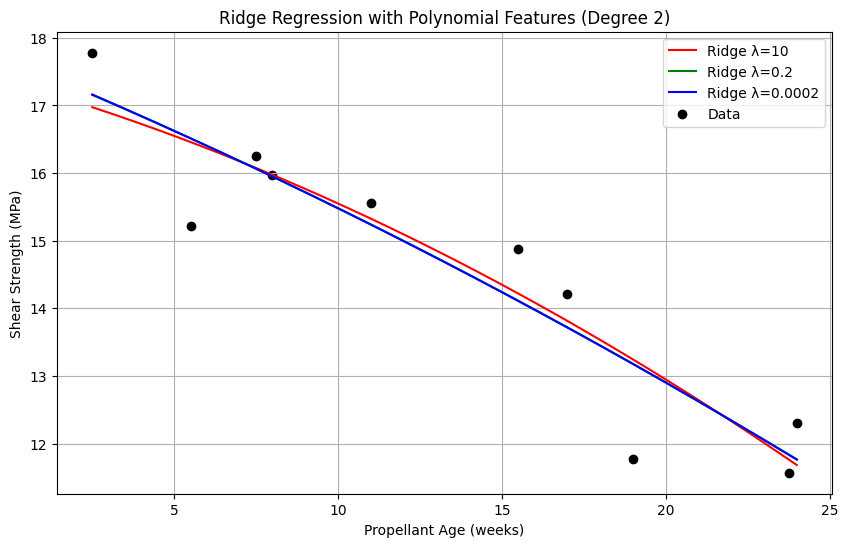

In [81]:
x_plot = np.linspace(min(x), max(x), 200).reshape(-1, 1)

plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i, l in enumerate(lambdaa):
    model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=l))
    model.fit(x, y)
    y_pred = model.predict(x_plot)
    plt.plot(x_plot, y_pred, label=f'Ridge λ={l}', color=colors[i])

plt.scatter(x, y, color='black', label='Data')
plt.title('Ridge Regression with Polynomial Features (Degree 2)')
plt.xlabel('Propellant Age (weeks)')
plt.ylabel('Shear Strength (MPa)')
plt.legend()
plt.grid(True)

plt.savefig("Ridge Regression (L2 Regularization)")
plt.show()
